<a href="https://colab.research.google.com/github/zeyadmageid/An-International-Comparative-Analysis-of-Penis-Measurements-Insights-from-Global-Data/blob/main/penile_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("data.csv",  encoding = "ISO-8859-1")
df.head()
#link to dataset: https://www.kaggle.com/datasets/antimoni/international-study-on-male-genital-measurements

,Country,Region,Flaccid Length (cm),Erect Length (cm),Flaccid Circumference (cm),Erect Circumference (cm),Flaccid Volume (cm³),Erect Volume (cm³),Growth Length,Growth Circumference,Growth Volume,N,Method
0,Afghanistan,Central Asia,9.5,13.69,9.1,11.42,62.60,142.08,1.441053,1.254945,2.269649,100,Measured
1,Albania,Europe,9.8,14.19,9.7,12.16,73.38,166.97,1.447959,1.253608,2.275416,95,Self reported
2,Algeria,Africa,9.9,14.49,8.9,10.97,62.40,138.76,1.463636,1.232584,2.223718,738,Self reported
3,Angola,Africa,10.0,15.73,9.6,11.82,73.34,174.89,1.573000,1.231250,2.384647,978,Measured
4,Argentina,South America,9.4,14.88,8.9,11.45,59.25,155.24,1.582979,1.286517,2.620084,1669,Self reported


# Exploring the data

In [5]:
df.shape #printing shape of data

(139, 13)

In [6]:
df.columns #printing column names

Index(['Country', 'Region', 'Flaccid Length (cm)', 'Erect Length (cm)',
       'Flaccid Circumference (cm)', 'Erect Circumference (cm)',
       'Flaccid Volume (cm³)', 'Erect Volume (cm³)', 'Growth Length ',
       'Growth Circumference ', 'Growth Volume ', 'N ', 'Method'],
      dtype='object')

In [7]:
df.dtypes #looking at the data type of each column

Country                        object
Region                         object
Flaccid Length (cm)           float64
Erect Length (cm)             float64
Flaccid Circumference (cm)    float64
Erect Circumference (cm)      float64
Flaccid Volume (cm³)          float64
Erect Volume (cm³)            float64
Growth Length                 float64
Growth Circumference          float64
Growth Volume                 float64
N                               int64
Method                         object
dtype: object

In [8]:
df.describe() #looking at a brief statistical analysis of numerical columns

,Flaccid Length (cm),Erect Length (cm),Flaccid Circumference (cm),Erect Circumference (cm),Flaccid Volume (cm³),Erect Volume (cm³),Growth Length,Growth Circumference,Growth Volume,N
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,9.504317,13.856259,9.385612,11.841079,67.492446,156.600360,1.457568,1.262262,2.323068,690.913669
std,1.091659,1.782799,0.627690,0.725479,14.913607,35.191536,0.086515,0.022009,0.159673,1022.290540
min,6.900000,9.430000,8.100000,10.250000,38.740000,88.020000,1.248214,1.231132,1.951904,50.000000
25%,8.800000,12.860000,8.900000,11.320000,56.355000,132.160000,1.439130,1.248156,2.273743,166.500000
50%,9.500000,13.980000,9.300000,11.730000,65.390000,152.750000,1.466265,1.254737,2.313511,380.000000
75%,10.000000,15.070000,9.800000,12.280000,77.665000,177.245000,1.476139,1.273971,2.415869,827.500000
max,12.200000,17.950000,10.900000,13.630000,108.190000,252.850000,1.597826,1.362791,2.639443,8976.000000


In [9]:
df.isna().sum() #checking for missing values

Country                       0
Region                        0
Flaccid Length (cm)           0
Erect Length (cm)             0
Flaccid Circumference (cm)    0
Erect Circumference (cm)      0
Flaccid Volume (cm³)          0
Erect Volume (cm³)            0
Growth Length                 0
Growth Circumference          0
Growth Volume                 0
N                             0
Method                        0
dtype: int64

In [10]:
#now I will rename the names of some columns
df.columns = df.columns.str.strip()
df = df.rename(columns={'Flaccid Length (cm)':'Flaccid_Len',
                   'Erect Length (cm)': 'Erect_Len',
                   'Flaccid Circumference (cm)': 'Flaccid_Circum',
                   'Erect Circumference (cm)':'Erect_Circum',
                   'Flaccid Volume (cm³)': 'Flaccid_Vol',
                   'Erect Volume (cm³)': 'Erect_Vol',
                   'Growth Length': 'Growth_Len',
                   'Growth Circumference': 'Growth_Circum',
                   'Growth Volume': 'Growth_Vol'})

In [11]:
df.columns #printing names of new columns

Index(['Country', 'Region', 'Flaccid_Len', 'Erect_Len', 'Flaccid_Circum',
       'Erect_Circum', 'Flaccid_Vol', 'Erect_Vol', 'Growth_Len',
       'Growth_Circum', 'Growth_Vol', 'N', 'Method'],
      dtype='object')

In [12]:
df.loc[df.duplicated()] #check if any rows are duplicated

,Country,Region,Flaccid_Len,Erect_Len,Flaccid_Circum,Erect_Circum,Flaccid_Vol,Erect_Vol,Growth_Len,Growth_Circum,Growth_Vol,N,Method


In [13]:
df.loc[df.duplicated(subset=['Country'])] #check to see if any country has multiple different measurements. This is to make sure that each country has only one sample measurement.

,Country,Region,Flaccid_Len,Erect_Len,Flaccid_Circum,Erect_Circum,Flaccid_Vol,Erect_Vol,Growth_Len,Growth_Circum,Growth_Vol,N,Method


Text(0, 0.5, 'Count')

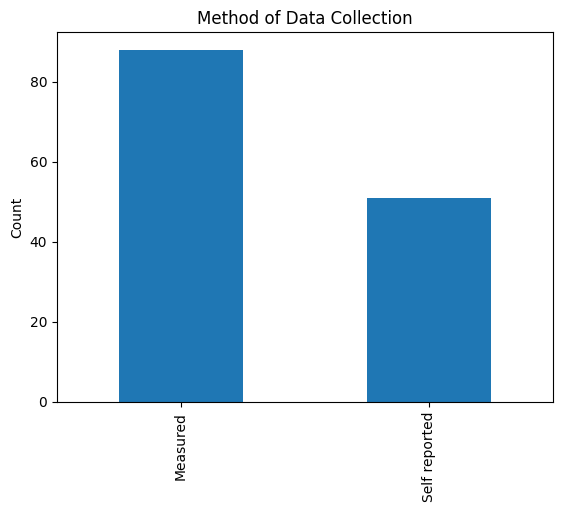

In [14]:
#now lets check the different methods by which the data was collected. This information is stored in column 'method'
ax = df['Method'].value_counts().plot(kind='bar', title='Method of Data Collection')
ax.set_ylabel('Count')
#we can see that some of the data is measured while some is self reported

Text(0, 0.5, 'Count')

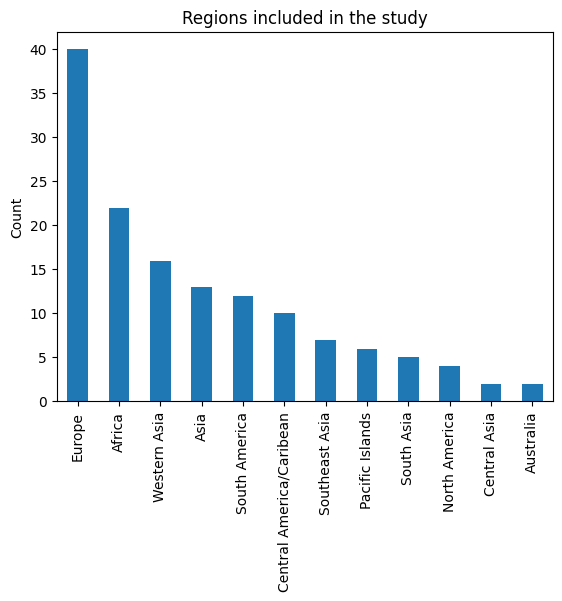

In [15]:
#now lets check the different regions included in this study
ax = df['Region'].value_counts().plot(kind='bar', title='Regions included in the study')
ax.set_ylabel('Count')
#this shows most of the countries in the study are European

Text(0, 0.5, 'Frequency')

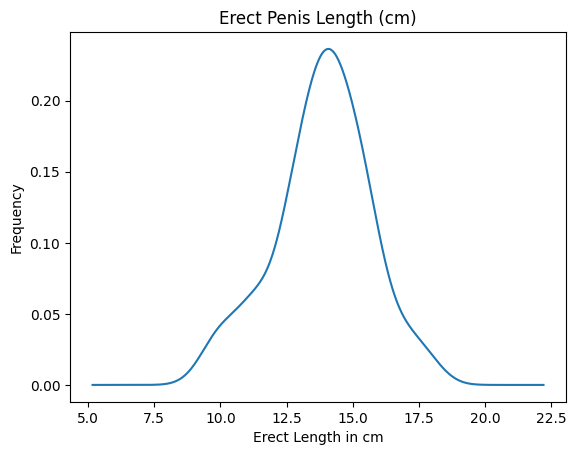

In [16]:
#now lets plot a density plot for the 'Erect Penile Length' column in this study
ax= df['Erect_Len'].plot(kind='kde', title='Erect Penis Length (cm)')
ax.set_xlabel('Erect Length in cm')
ax.set_ylabel('Frequency')

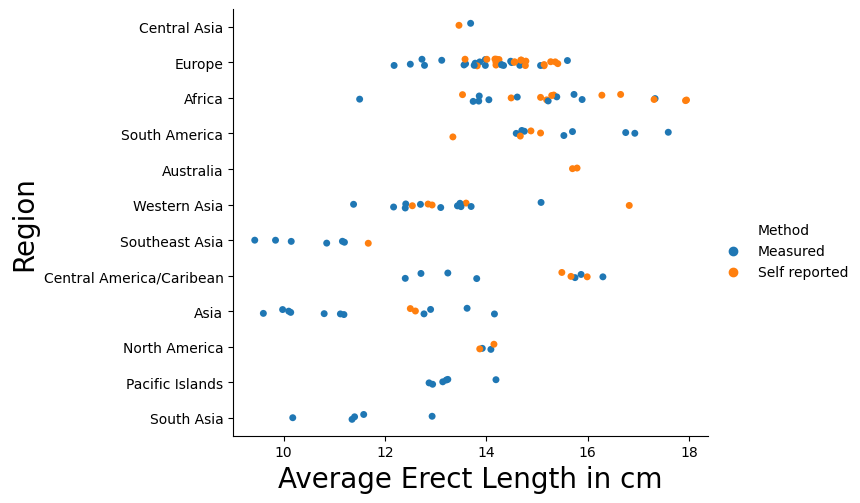

In [17]:
#cat plot of the distribution of erect penile lengths across regions
sns.catplot(y="Region", x="Erect_Len", data=df, hue='Method', aspect = 1.5 ,height=5)
plt.xlabel("Average Erect Length in cm",fontsize=20)
plt.ylabel("Region",fontsize=20)
plt.show()

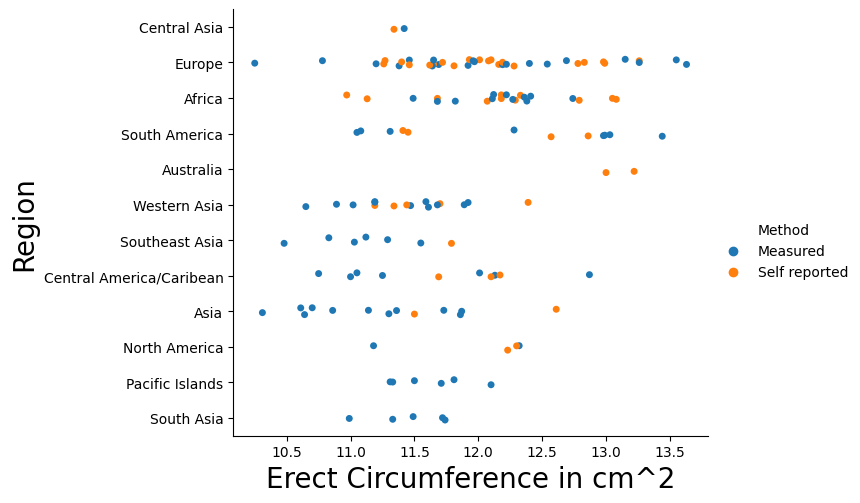

In [18]:
#cat plot of the distribution of erect penile circumference across regions
sns.catplot(y="Region", x="Erect_Circum", data=df, hue='Method', aspect = 1.5 ,height=5)
plt.xlabel("Erect Circumference in cm^2",fontsize=20)
plt.ylabel("Region",fontsize=20)
plt.show()

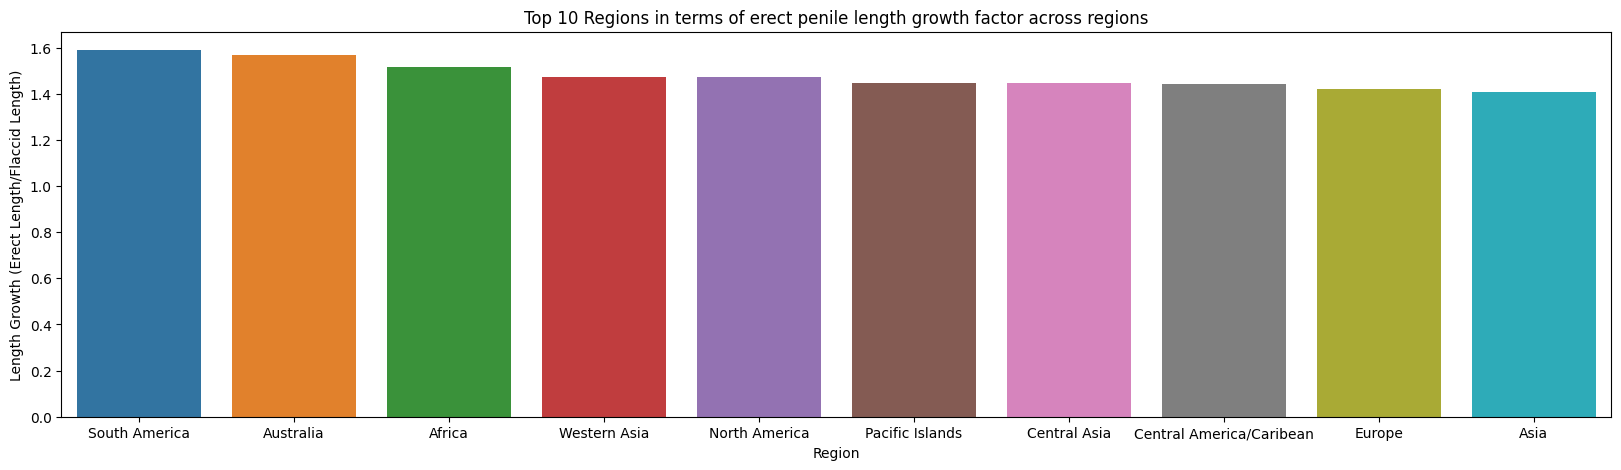

In [19]:
#bar plot of the top 10 countries in terms of erect penile length growth factor across regions

sr_df = df.groupby('Region')['Growth_Len'].mean().reset_index().sort_values(by='Growth_Len', ascending=False)
dff = sr_df.head(10)
fig, ax = plt.subplots(figsize=(20, 5))

sns.barplot(data=dff, x='Region', y='Growth_Len')
plt.xlabel('Region')
plt.ylabel('Length Growth (Erect Length/Flaccid Length)')
plt.title('Top 10 Regions in terms of erect penile length growth factor across regions')
plt.show()

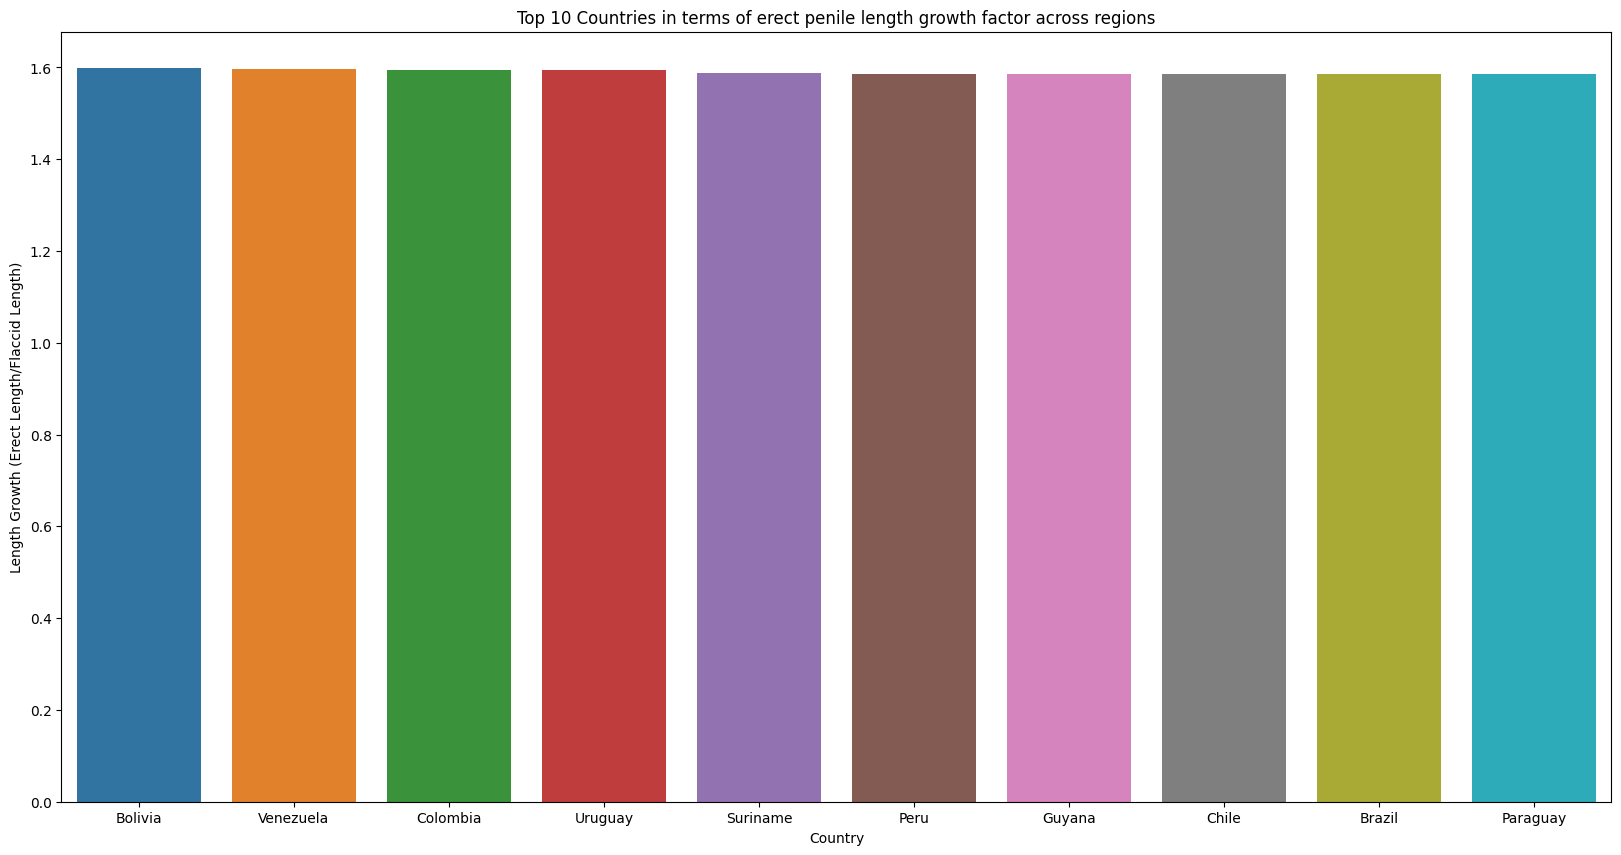

In [20]:
country_df = df.groupby('Country')['Growth_Len'].mean().reset_index().sort_values(by='Growth_Len', ascending=False)
dff = country_df.head(10)
fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(data=dff, x='Country', y='Growth_Len')
plt.xlabel('Country')
plt.ylabel('Length Growth (Erect Length/Flaccid Length)')
plt.title('Top 10 Countries in terms of erect penile length growth factor across regions')
plt.show()

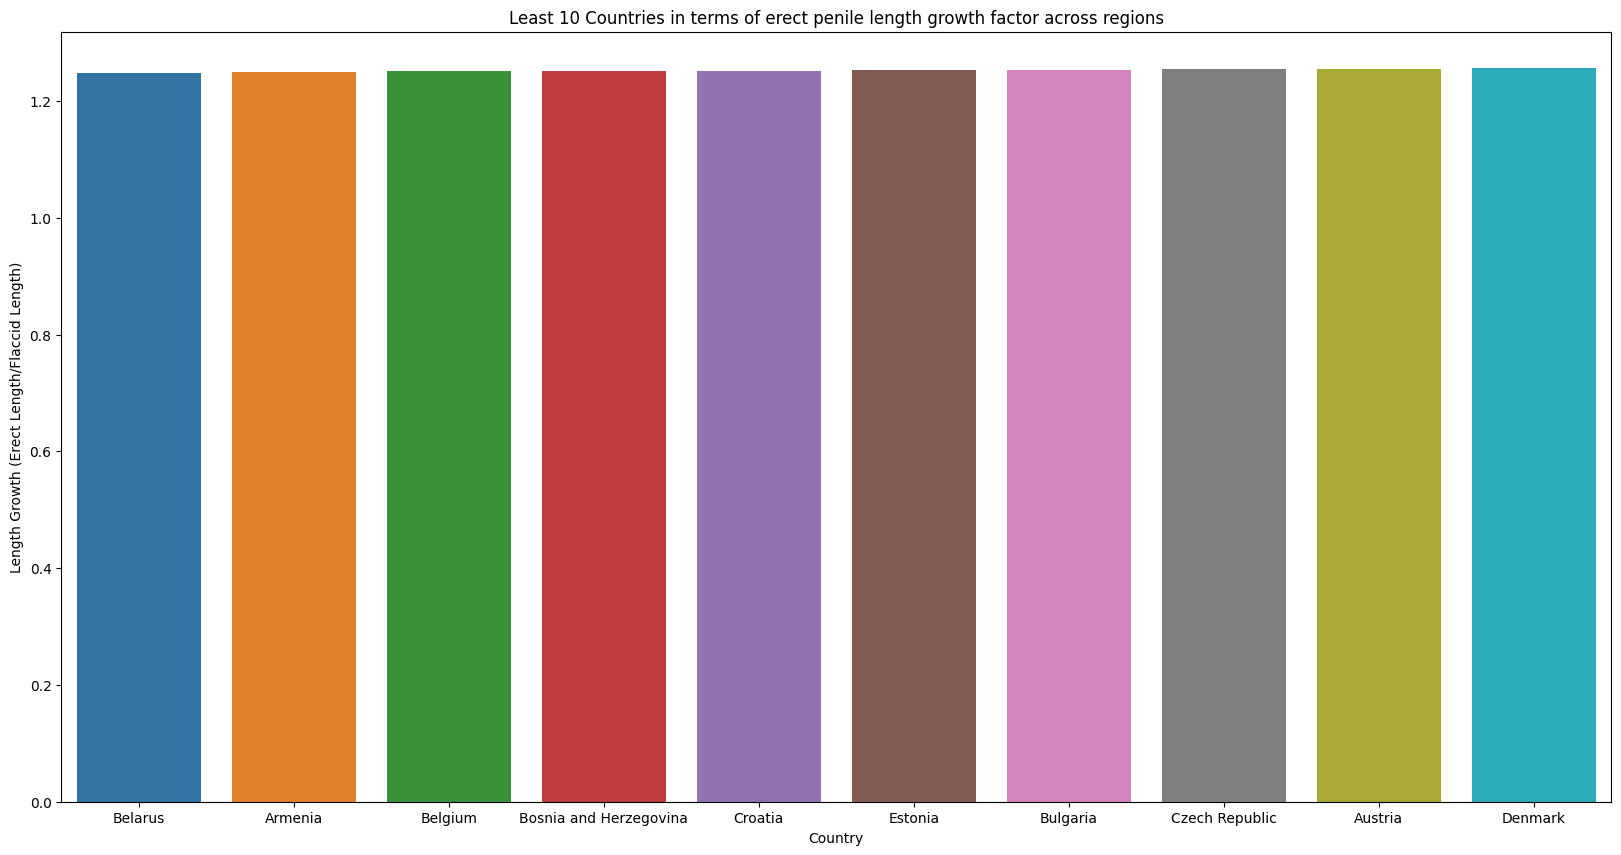

In [21]:
country_df = df.groupby('Country')['Growth_Len'].mean().reset_index().sort_values(by='Growth_Len', ascending=True)
dff = country_df.head(10)
fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(data=dff, x='Country', y='Growth_Len')
plt.xlabel('Country')
plt.ylabel('Length Growth (Erect Length/Flaccid Length)')
plt.title('Least 10 Countries in terms of erect penile length growth factor across regions')
plt.show()

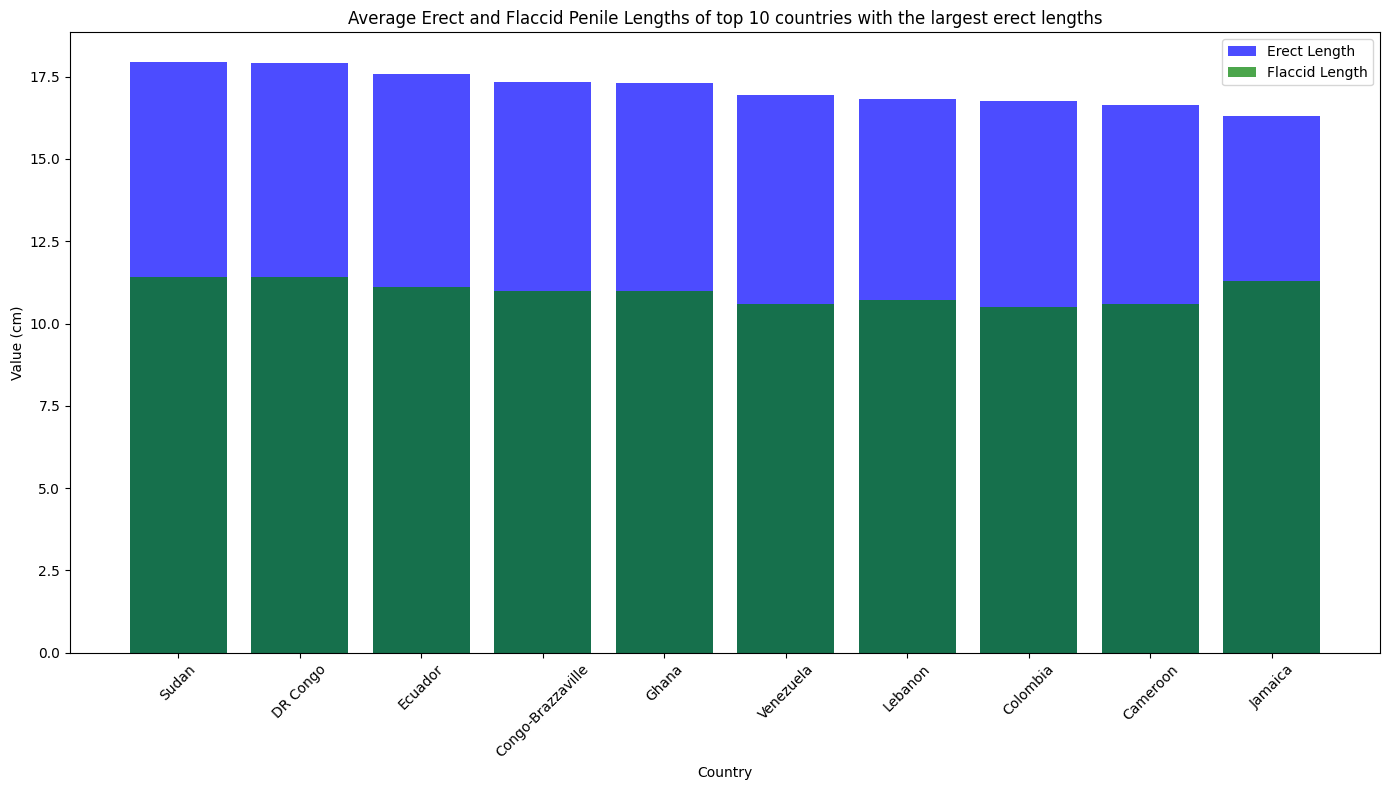

In [22]:
country_stats = df.groupby('Country')[['Erect_Len','Flaccid_Len']].mean().reset_index().sort_values(by='Erect_Len', ascending=False).head(10)

plt.figure(figsize=(14, 8))
plt.bar(country_stats['Country'], country_stats['Erect_Len'], label='Erect Length', color='blue', alpha=0.7)
plt.bar(country_stats['Country'], country_stats['Flaccid_Len'], label='Flaccid Length', color='green', alpha=0.7)

# Add labels and a legend
plt.xlabel('Country')
plt.ylabel('Value (cm)')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Add a title
plt.title('Average Erect and Flaccid Penile Lengths of top 10 countries with the largest erect lengths')

# Show the plot
plt.tight_layout()
plt.show()

# Exploring Relationships between columns

First let's explore the correlation nature between flaccid length and erect length. We will calculate the correlation coefficient first then plot a scatterplot.

In [23]:
correlation = df['Erect_Len'].corr(df['Flaccid_Len'])
print(f"Pearson Correlation Coefficient between erect and flaccid penile lengths: {correlation}")

Pearson Correlation Coefficient between erect and flaccid penile lengths: 0.8640515273461055


Text(0.5, 1.0, 'Erect Length vs Flaccid Length')

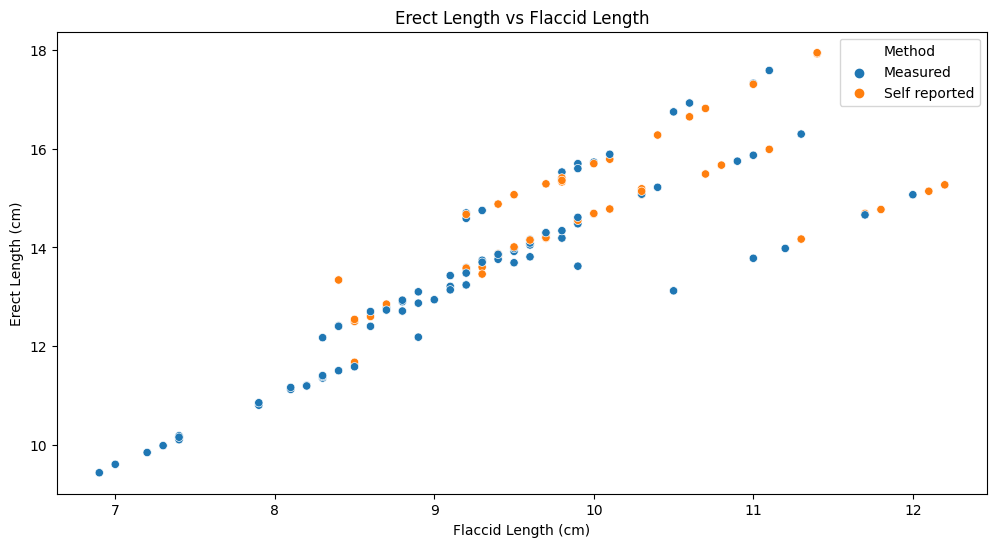

In [24]:
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(x='Flaccid_Len', y='Erect_Len', hue='Method', data=df)
ax.set_xlabel('Flaccid Length (cm)')
ax.set_ylabel('Erect Length (cm)')
ax.set_title('Erect Length vs Flaccid Length')

**Conclusion:** The correlation coefficient is 0.86 which implies a strong positive correlation. This is confirmed by the scatterplot above.

Next, let us investigate the relationship between erect length and erect circumference.

In [25]:
correlation = df['Erect_Len'].corr(df['Erect_Circum'])
print(f"Pearson Correlation Coefficient between erect penile length and circumference: {correlation}")

Pearson Correlation Coefficient between erect penile length and circumference: 0.5824605446768235


Text(0.5, 1.0, 'Erect Length vs Circumference')

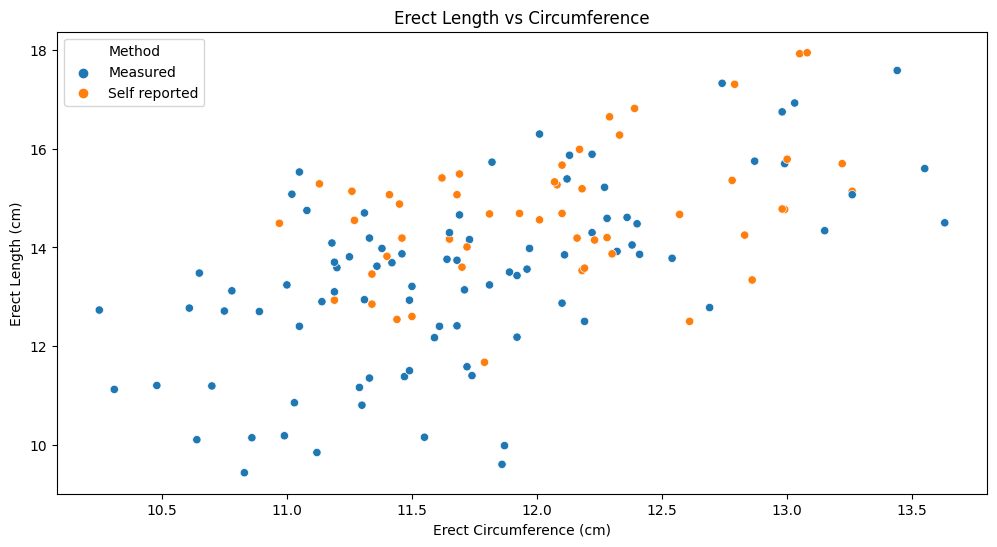

In [26]:
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(x='Erect_Circum', y='Erect_Len', hue='Method', data=df)
ax.set_xlabel('Erect Circumference (cm)')
ax.set_ylabel('Erect Length (cm)')
ax.set_title('Erect Length vs Circumference')

**Conclusion:** There is no strong correlation between the erect length and erect circumference.

Let us investigate the correlation between Erect penile length and the growth factor. In other words, we can to check if there is a relationship between the erect penile length and the factor by which flaccid length divides erect length.

In [27]:
correlation = df['Erect_Len'].corr(df['Growth_Len'])
print(f"Pearson Correlation Coefficient between erect penile length and growth length: {correlation}")

Pearson Correlation Coefficient between erect penile length and growth length: 0.528789470919782


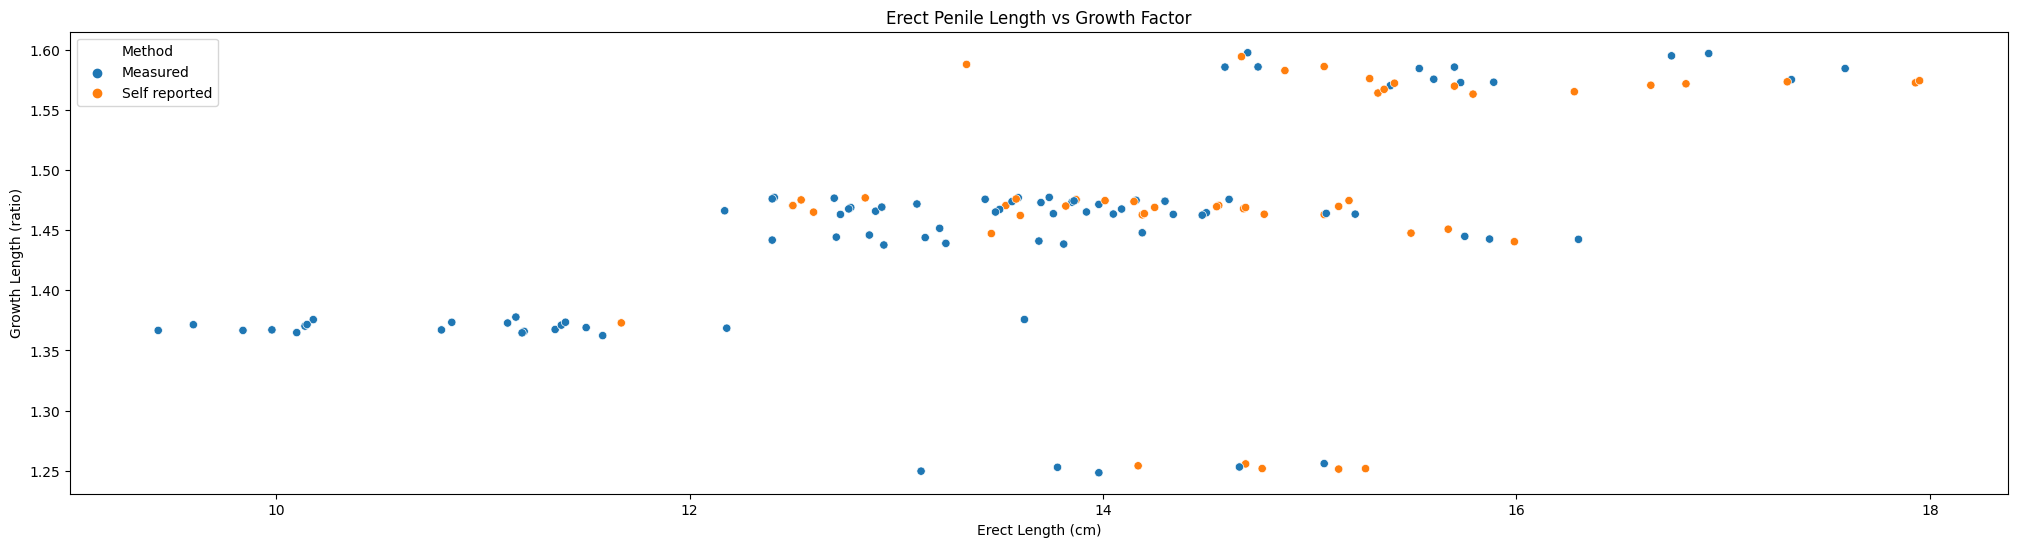

In [28]:
plt.figure(figsize=(25, 6))
ax = sns.scatterplot(x='Erect_Len', y='Growth_Len', hue='Method', data=df)
ax.set_xlabel('Erect Length (cm)')
ax.set_ylabel('Growth Length (ratio)')
ax.set_title('Erect Penile Length vs Growth Factor')
plt.show()

Conclusion: No Strong Correlation Found.

Let's invesitage the correlation between Erect and flaccid circumference.

In [29]:
correlation = df['Flaccid_Circum'].corr(df['Erect_Circum'])
print(f"Pearson Correlation Coefficien between flaccid and erect penile circumference: {correlation}")

Pearson Correlation Coefficien between flaccid and erect penile circumference: 0.9689587072742386


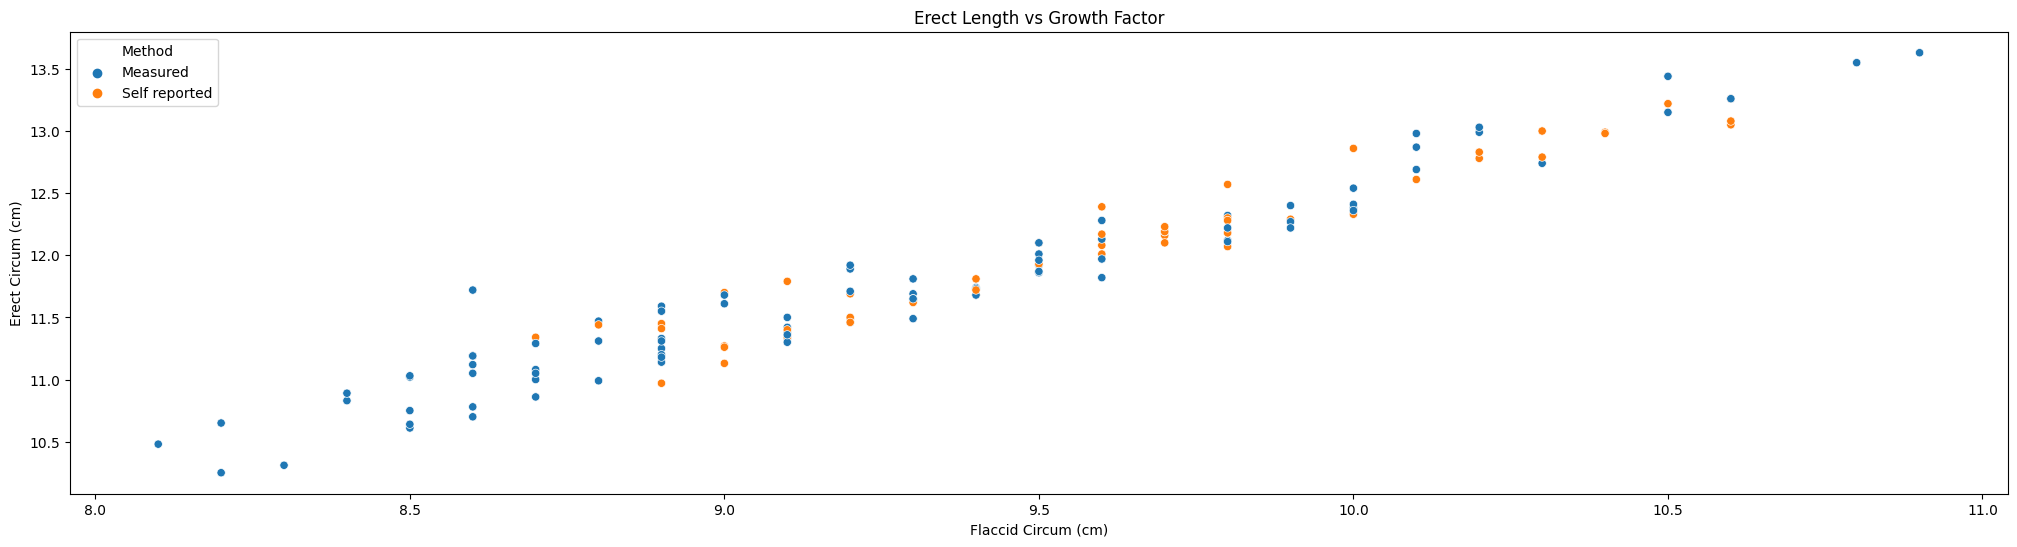

In [30]:
plt.figure(figsize=(25, 6))
ax = sns.scatterplot(x='Flaccid_Circum', y='Erect_Circum', hue='Method', data=df)
ax.set_xlabel('Flaccid Circum (cm)')
ax.set_ylabel('Erect Circum (cm)')
ax.set_title('Erect Length vs Growth Factor')
plt.show()

Now we use seaborn's pairplot and heat map to look at the relationship between various features in one graph

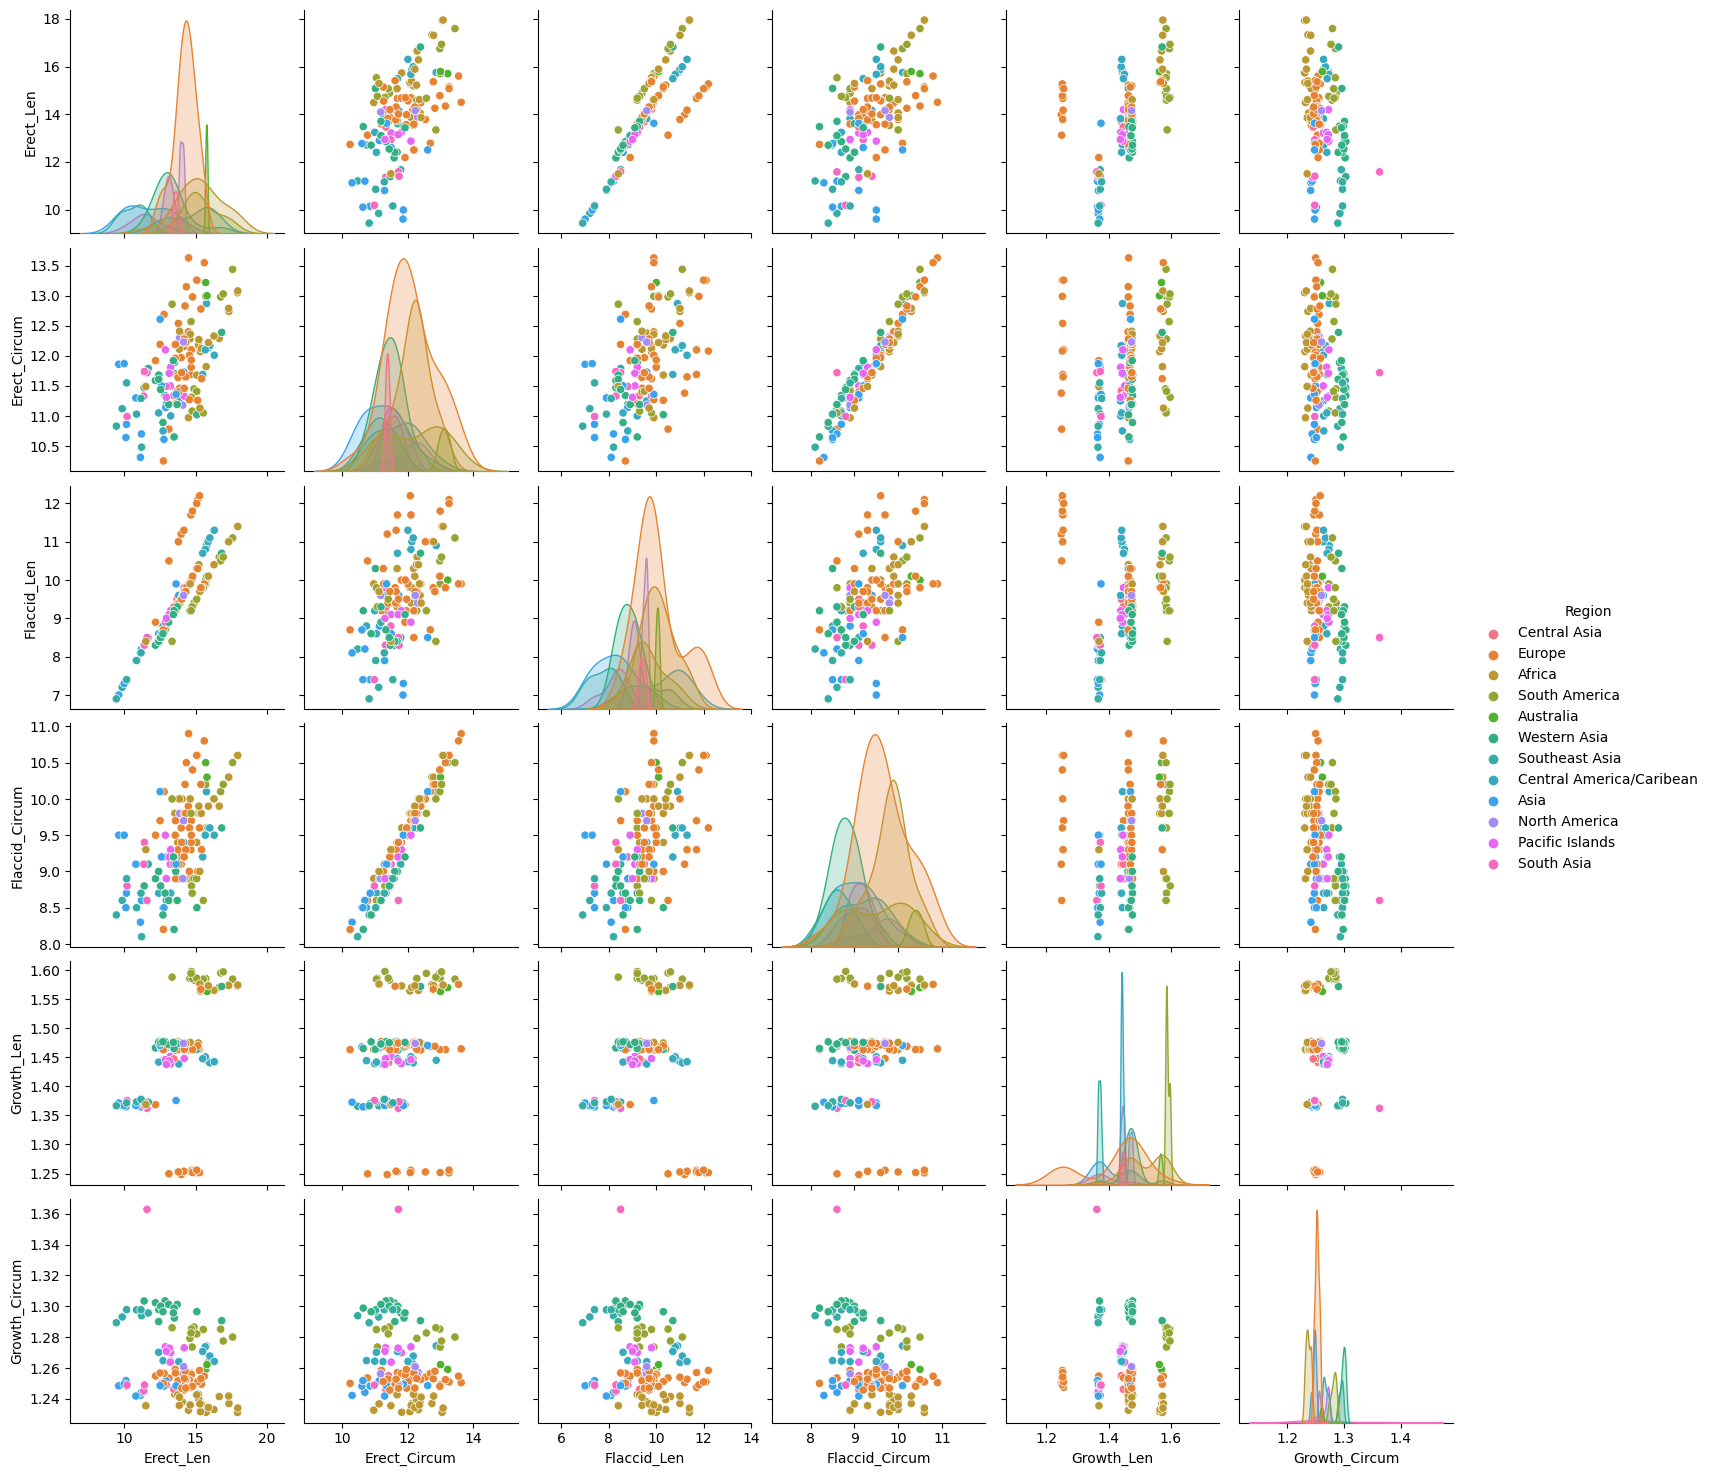

In [31]:
sns.pairplot(df,
             vars= ['Erect_Len','Erect_Circum','Flaccid_Len','Flaccid_Circum','Growth_Len','Growth_Circum'],
             hue='Region')

<Axes: >

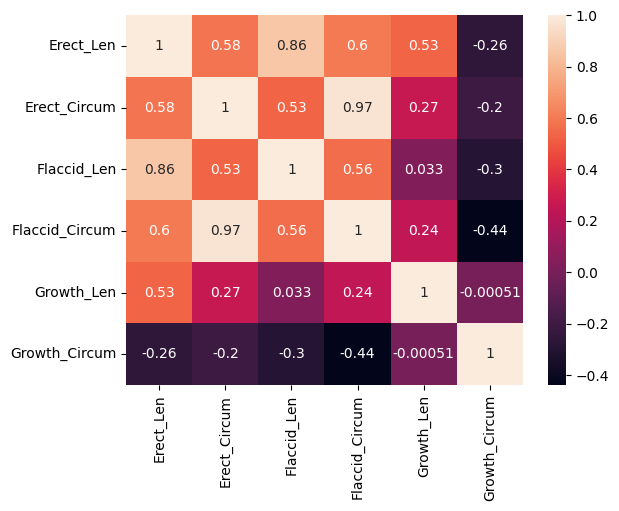

In [32]:
dcorr=df[['Erect_Len','Erect_Circum','Flaccid_Len','Flaccid_Circum','Growth_Len','Growth_Circum']].corr()
sns.heatmap(dcorr, annot=True)

In [33]:
dcorr

,Erect_Len,Erect_Circum,Flaccid_Len,Flaccid_Circum,Growth_Len,Growth_Circum
Erect_Len,1.000000,0.582461,0.864052,0.599875,0.528789,-0.259208
Erect_Circum,0.582461,1.000000,0.527916,0.968959,0.265024,-0.203683
Flaccid_Len,0.864052,0.527916,1.000000,0.559625,0.032742,-0.296903
Flaccid_Circum,0.599875,0.968959,0.559625,1.000000,0.242563,-0.438929
Growth_Len,0.528789,0.265024,0.032742,0.242563,1.000000,-0.000505
Growth_Circum,-0.259208,-0.203683,-0.296903,-0.438929,-0.000505,1.000000


# Web Scraping

Next, let's investigate if there is any relationship between erect penile measurements and height. In order to obtain male height measurements for each country, let's perform web scraping.

In [34]:
import sys
import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

In [35]:
static_url = "https://en.wikipedia.org/wiki/Average_human_height_by_country"

In [36]:
response = requests.get(static_url)

In [37]:
soup = BeautifulSoup(response.content, 'html.parser')

In [38]:
soup.title #confirming the title of the webpage

<title>Average human height by country - Wikipedia</title>

In [39]:
html_tables = soup.find_all('table')

In [40]:
table = html_tables[0] #loading the first table

In [41]:
data = my_dict = {"Country":[],"Height (cm)":[]};

for row in table.find('tbody').find_all('tr'): #iterating through the table row by row

  cells = row.find_all('td')

  if len(cells) >= 2:
        country = cells[0].text.strip()
        height_str = cells[1].text.strip() #the average male height is the second column
        height_parts = height_str.split()

        # Initialize the height in centimeters
        height_in_cm = ''

        # Find the part containing "cm" and get the numeric value

        h=''

        for part in height_parts:
            h = h + part
            '''if height_str == '—':
                h=np.nan
                break

            elif part == 'c':
                h = float(h)
                break'''

            if 'cm' in part:
                height_value = part.replace('cm', '').strip()
                if height_value.isdigit():  # Check if it's a valid numeric value
                    height_value = height_value[:-2]
                    h = float(height_value)
                break

        data["Country"].append(country)
        data["Height (cm)"].append(h)

In [42]:
height_df = pd.DataFrame(data)
height_df['Height (cm)'] = height_df['Height (cm)'].str.replace('cm', '')
height_df['Height (cm)'] = height_df['Height (cm)'].str.replace('—', 'NaN') #identifying the missing samples in the table
height_df['Height (cm)'] = height_df['Height (cm)'].replace('[convert:invalidnumber]', float('nan'))
height_df

,Country,Height (cm)
0,Afghanistan,168.2
1,Albania,176.6
2,Albania,174
3,Algeria,169.7
4,Argentina,174.5
...,...,...
223,Uzbekistan,169.6
224,Vanuatu,167.8
225,Vietnam,168.1
226,Zambia,NaN


In [43]:
height_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Country      228 non-null    object
 1   Height (cm)  228 non-null    object
dtypes: object(2)
memory usage: 3.7+ KB


In [45]:
height_df.isna().sum() #counting missisng values

Country        0
Height (cm)    0
dtype: int64

In [46]:
height_df = height_df[~(height_df['Height (cm)']=='NaN')] #we excluded countries without measurements
height_df['Height (cm)'] = height_df['Height (cm)'].astype(float)
height_df.head()

<ipython-input-46-8460ad77a094>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  height_df['Height (cm)'] = height_df['Height (cm)'].astype(float)


,Country,Height (cm)
0,Afghanistan,168.2
1,Albania,176.6
2,Albania,174.0
3,Algeria,169.7
4,Argentina,174.5


In [47]:
df.head() #now lets print our original dataset as a reminder

,Country,Region,Flaccid_Len,Erect_Len,Flaccid_Circum,Erect_Circum,Flaccid_Vol,Erect_Vol,Growth_Len,Growth_Circum,Growth_Vol,N,Method
0,Afghanistan,Central Asia,9.5,13.69,9.1,11.42,62.60,142.08,1.441053,1.254945,2.269649,100,Measured
1,Albania,Europe,9.8,14.19,9.7,12.16,73.38,166.97,1.447959,1.253608,2.275416,95,Self reported
2,Algeria,Africa,9.9,14.49,8.9,10.97,62.40,138.76,1.463636,1.232584,2.223718,738,Self reported
3,Angola,Africa,10.0,15.73,9.6,11.82,73.34,174.89,1.573000,1.231250,2.384647,978,Measured
4,Argentina,South America,9.4,14.88,8.9,11.45,59.25,155.24,1.582979,1.286517,2.620084,1669,Self reported


In [48]:
merged_df = df.merge(height_df, on='Country', how='inner') #merging the original df and the height df on the country column

In [49]:
df = merged_df
df.head()

,Country,Region,Flaccid_Len,Erect_Len,Flaccid_Circum,Erect_Circum,Flaccid_Vol,Erect_Vol,Growth_Len,Growth_Circum,Growth_Vol,N,Method,Height (cm)
0,Afghanistan,Central Asia,9.5,13.69,9.1,11.42,62.60,142.08,1.441053,1.254945,2.269649,100,Measured,168.2
1,Albania,Europe,9.8,14.19,9.7,12.16,73.38,166.97,1.447959,1.253608,2.275416,95,Self reported,176.6
2,Albania,Europe,9.8,14.19,9.7,12.16,73.38,166.97,1.447959,1.253608,2.275416,95,Self reported,174.0
3,Algeria,Africa,9.9,14.49,8.9,10.97,62.40,138.76,1.463636,1.232584,2.223718,738,Self reported,169.7
4,Argentina,South America,9.4,14.88,8.9,11.45,59.25,155.24,1.582979,1.286517,2.620084,1669,Self reported,174.5


In [50]:
df.isna().sum() #checking for any missing values

Country           0
Region            0
Flaccid_Len       0
Erect_Len         0
Flaccid_Circum    0
Erect_Circum      0
Flaccid_Vol       0
Erect_Vol         0
Growth_Len        0
Growth_Circum     0
Growth_Vol        0
N                 0
Method            0
Height (cm)       0
dtype: int64

In [55]:
missing_rows = df[df.isna().any(axis=1)].index
for i in missing_rows:
  print("Countries missing the height value:", df.loc[missing_rows[i],:]['Country'])

# Some more analysis!

Now that we have imported average male height for each country, let's do some analysis regarding the new added feature

Text(0, 0.5, 'Frequency')

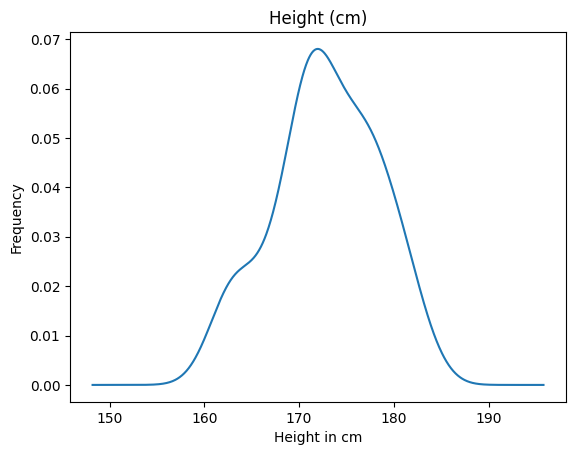

In [61]:
#now lets look at the distribution of the height globally
ax= df['Height (cm)'].plot(kind='kde', title='Distribution of Height (cm)')
ax.set_xlabel('Height in cm')
ax.set_ylabel('Frequency')

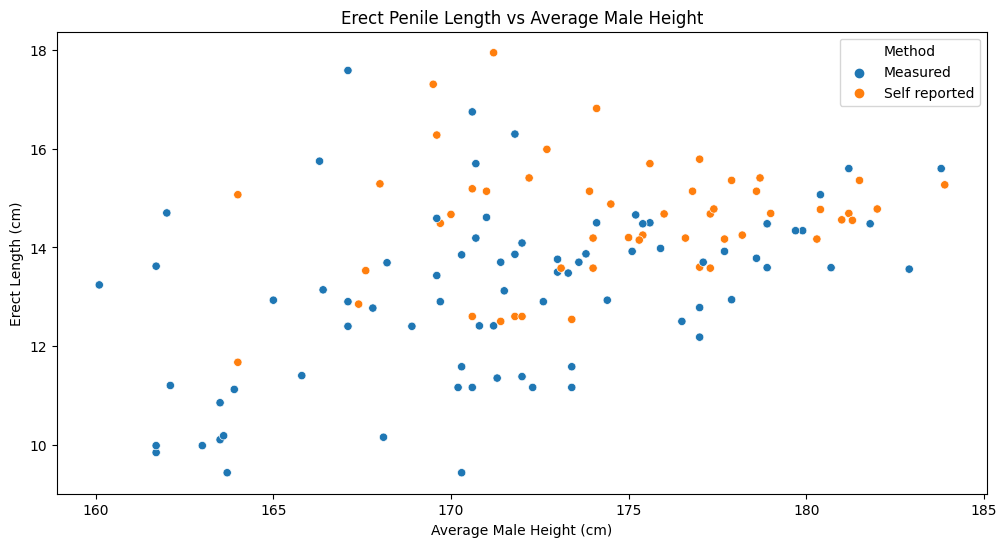

In [56]:
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(x='Height (cm)', y='Erect_Len', hue='Method', data=df)
ax.set_xlabel('Average Male Height (cm)')
ax.set_ylabel('Erect Length (cm)')
ax.set_title('Erect Penile Length vs Average Male Height')
plt.show()

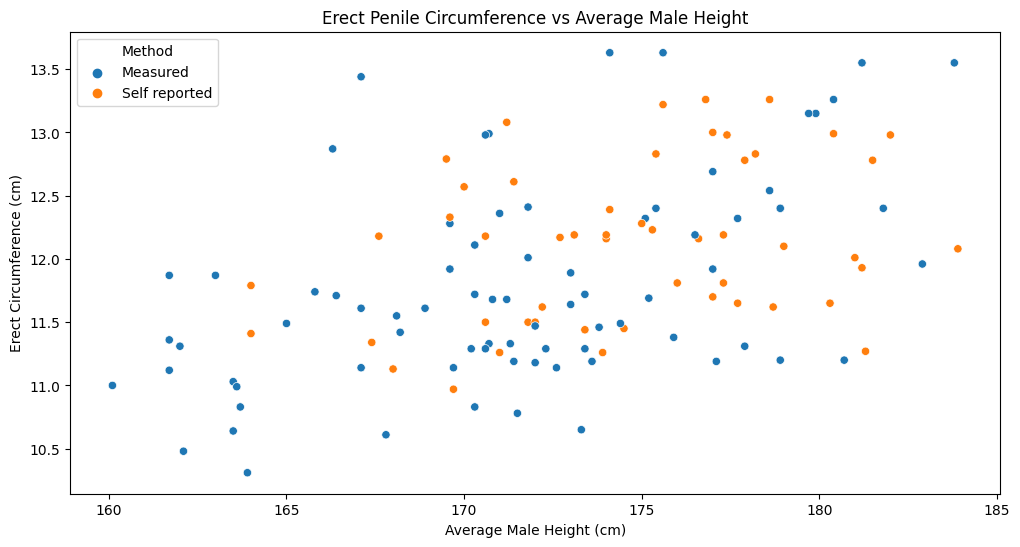

In [57]:
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(x='Height (cm)', y='Erect_Circum', hue='Method', data=df)
ax.set_xlabel('Average Male Height (cm)')
ax.set_ylabel('Erect Circumference (cm)')
ax.set_title('Erect Penile Circumference vs Average Male Height')
plt.show()

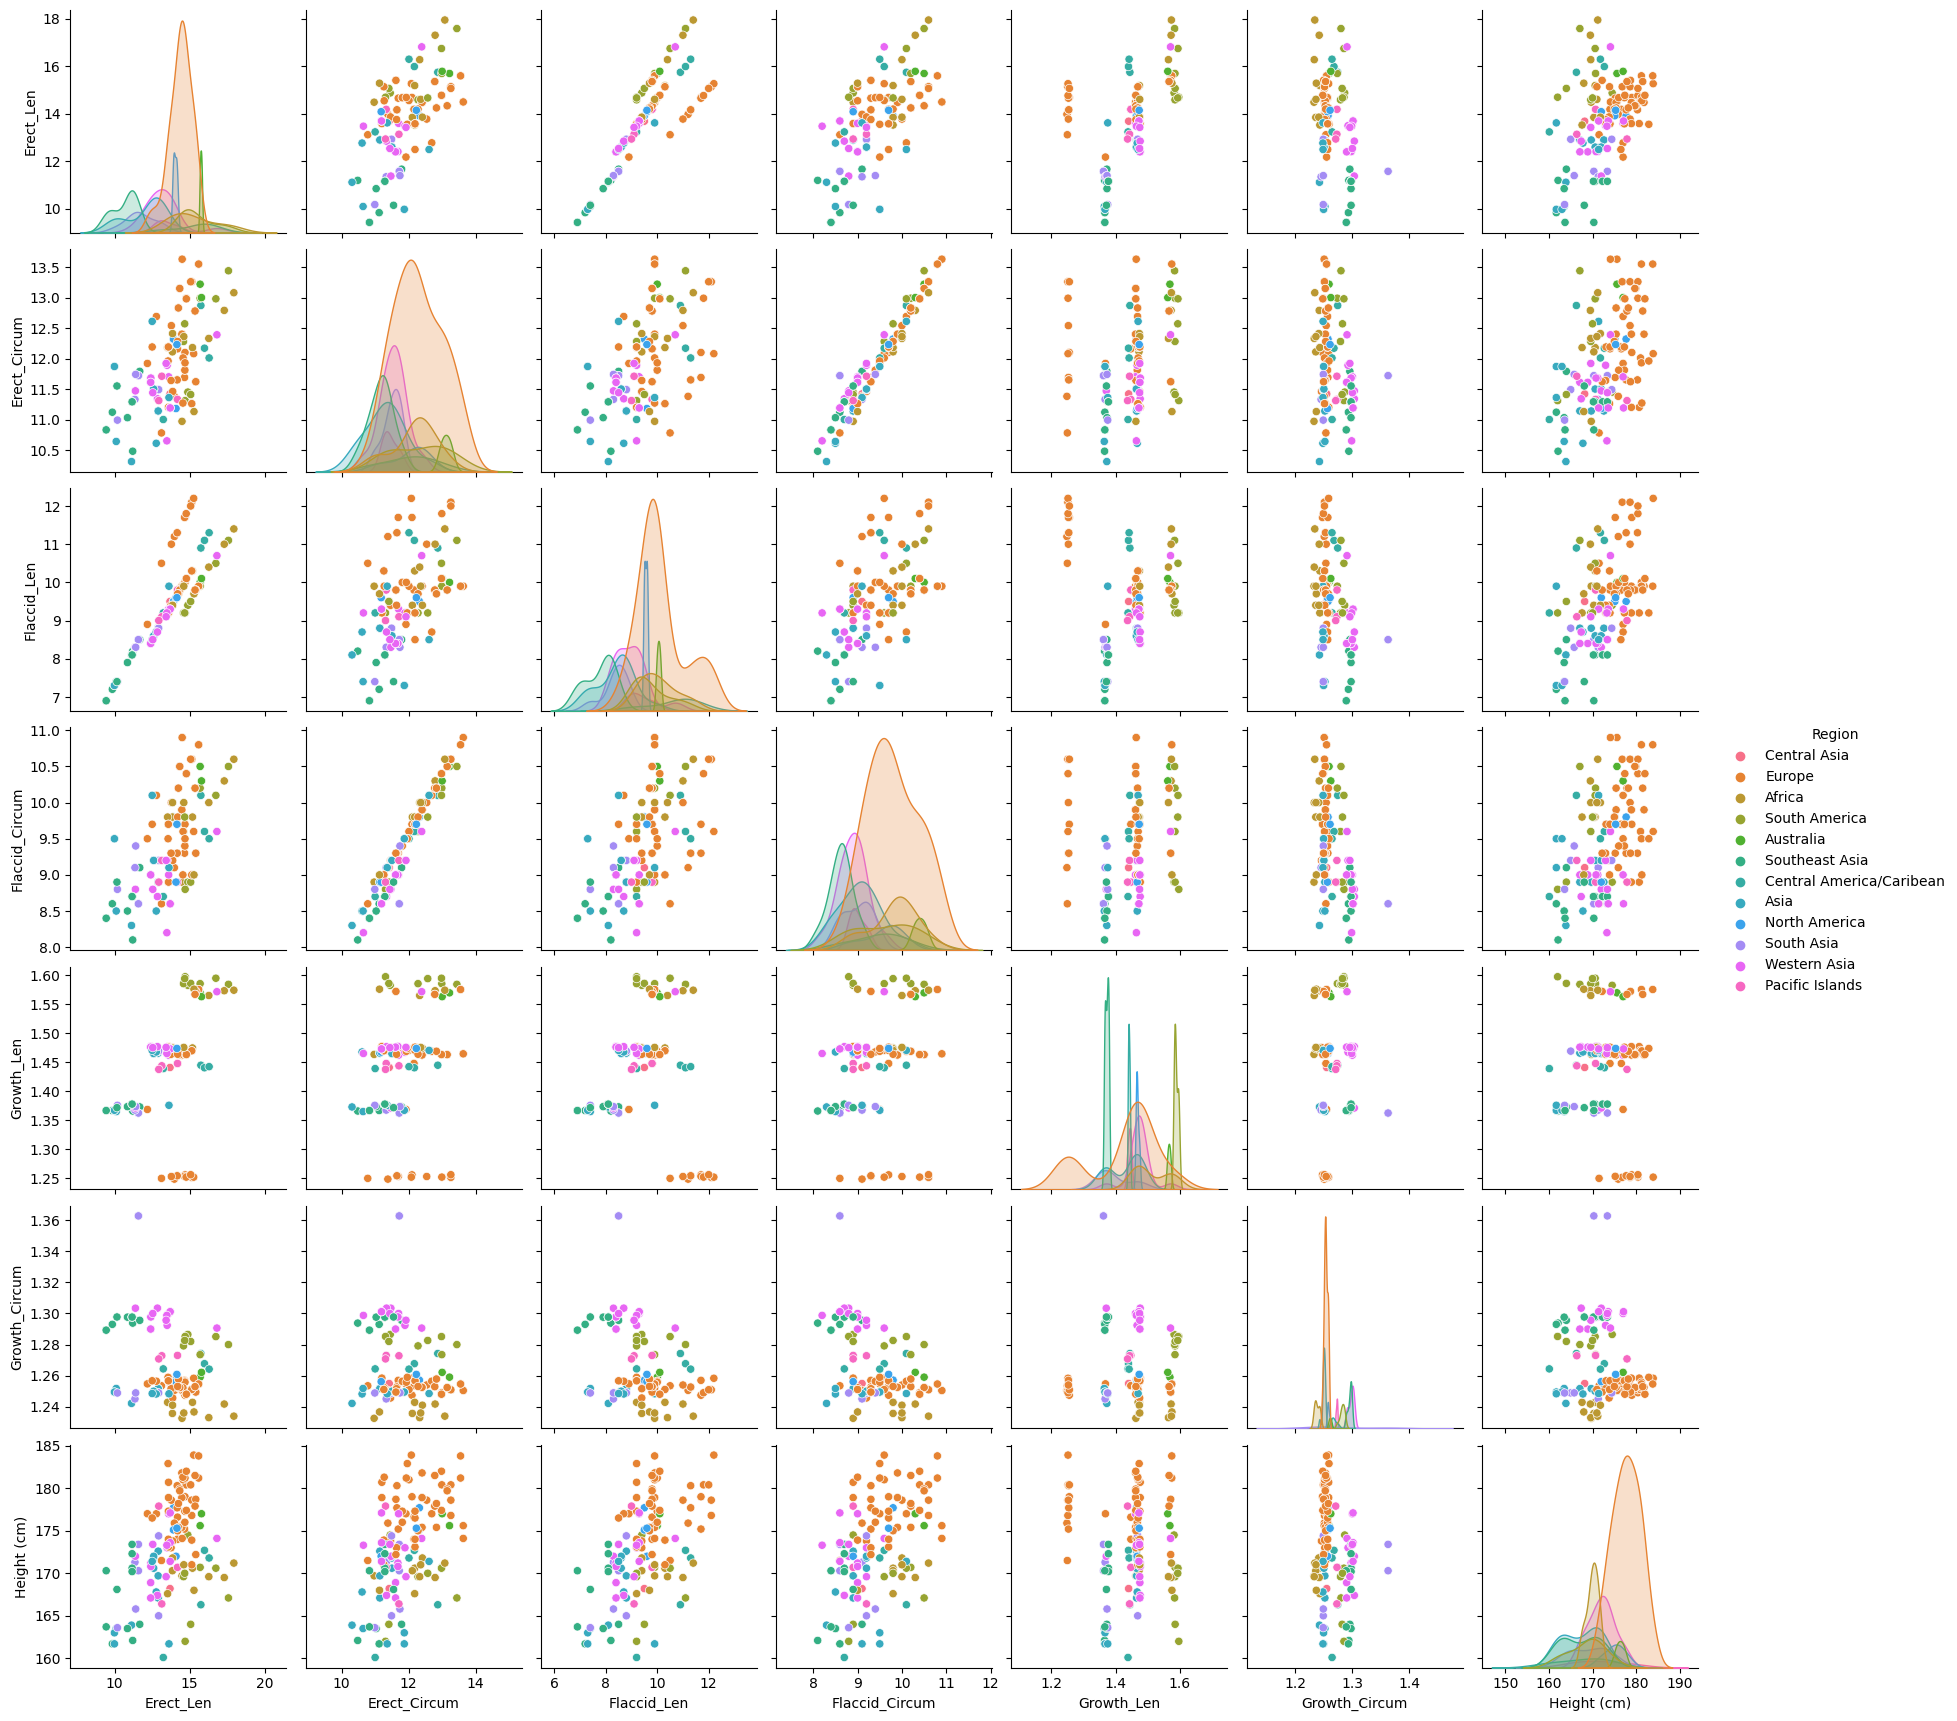

In [58]:
sns.pairplot(df,
             vars= ['Erect_Len','Erect_Circum','Flaccid_Len','Flaccid_Circum','Growth_Len','Growth_Circum','Height (cm)'],
             hue='Region')

<Axes: >

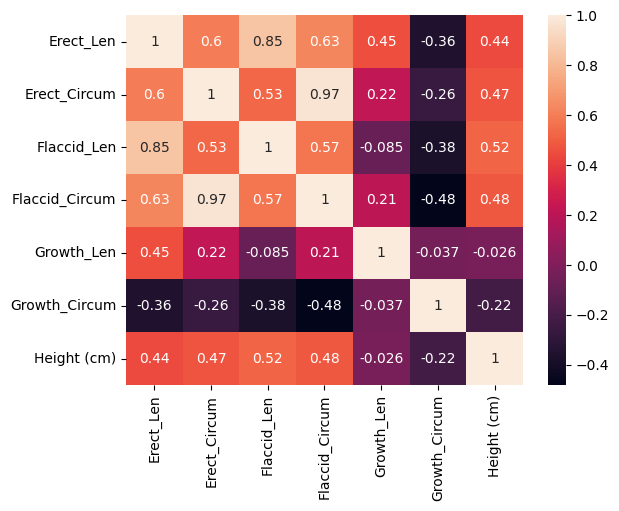

In [59]:
dcorr=df[['Erect_Len','Erect_Circum','Flaccid_Len','Flaccid_Circum','Growth_Len','Growth_Circum','Height (cm)']].corr()
sns.heatmap(dcorr, annot=True)

**Conclusion:** No strong correlation found between height and any penile measurements